In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [22]:
df = pd.read_csv('/Users/suryatejachalla/Research/Re-entry-Prediction/Data/data.csv')
df.head()

,SL.NO,Norad_id,Ballistic Co-efficient,B*,Apogee,Perigee,Altitude,A/M,CD,TLE Epoch,Decay_epoch,Time elapsed
0,1,4486,0.170,0.000301,219,127,135,0.031,1.0,5/27/19 19:06,5/27/19 22:01,2:54
1,2,6792,1.000,0.000934,340,95,339,0.045,1.0,2/25/20 11:40,2/25/20 13:31,1:50
2,3,7382,0.646,0.000584,823,86,661,0.012,1.0,5/30/17 21:42,5/31/17 17:41,19:58
3,4,8063,0.126,0.000276,158,143,168,0.018,1.0,5/20/17 10:37,5/20/17 15:05,4:27
4,5,8418,1.000,0.001239,520,73,515,0.018,1.0,3/24/19 1:47,3/24/19 2:39,0:51


In [23]:
df = df.drop(['SL.NO', 'Norad_id', 'CD', 'TLE Epoch', 'Decay_epoch', 'Time elapsed'], axis=1)

In [24]:
df.head()

,Ballistic Co-efficient,B*,Apogee,Perigee,Altitude,A/M
0,0.170,0.000301,219,127,135,0.031
1,1.000,0.000934,340,95,339,0.045
2,0.646,0.000584,823,86,661,0.012
3,0.126,0.000276,158,143,168,0.018
4,1.000,0.001239,520,73,515,0.018


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ballistic Co-efficient  1335 non-null   float64
 1   B*                      1335 non-null   float64
 2   Apogee                  1335 non-null   int64  
 3   Perigee                 1335 non-null   int64  
 4   Altitude                1335 non-null   int64  
 5   A/M                     1335 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 62.7 KB


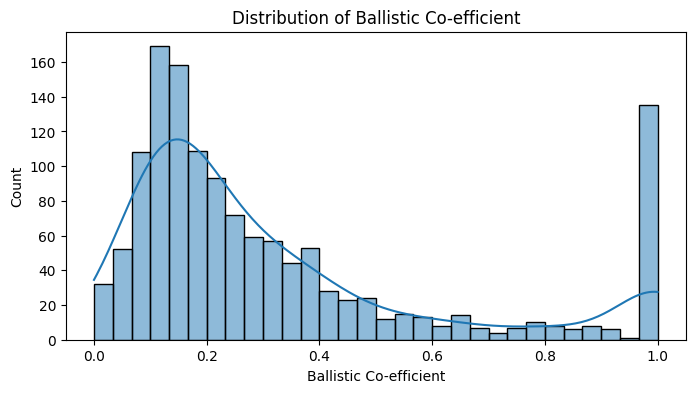

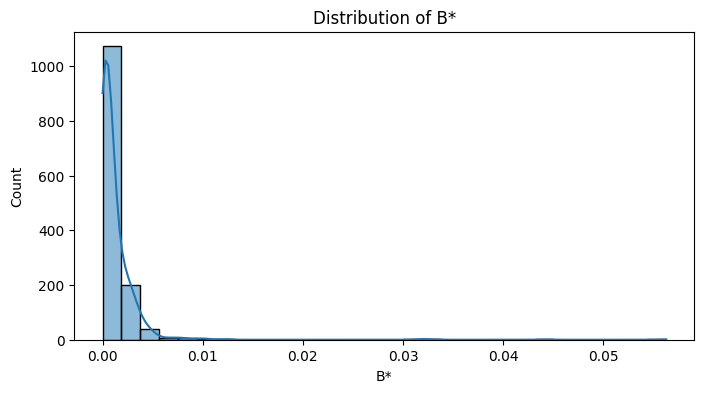

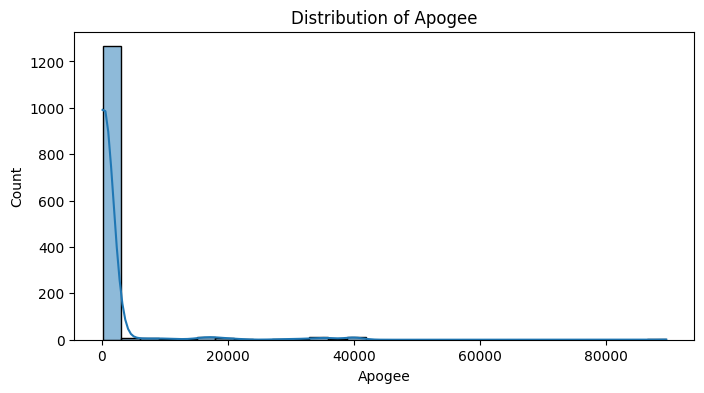

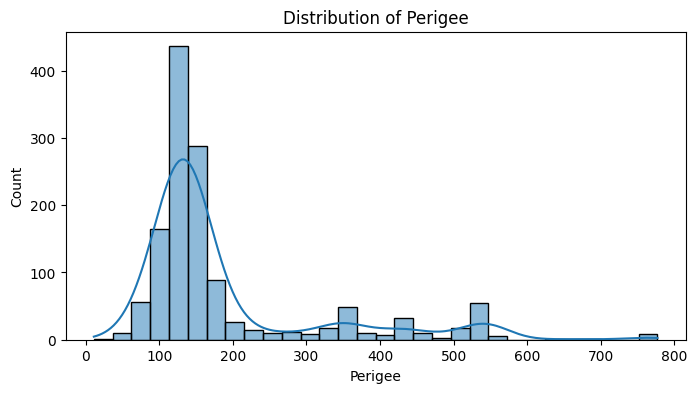

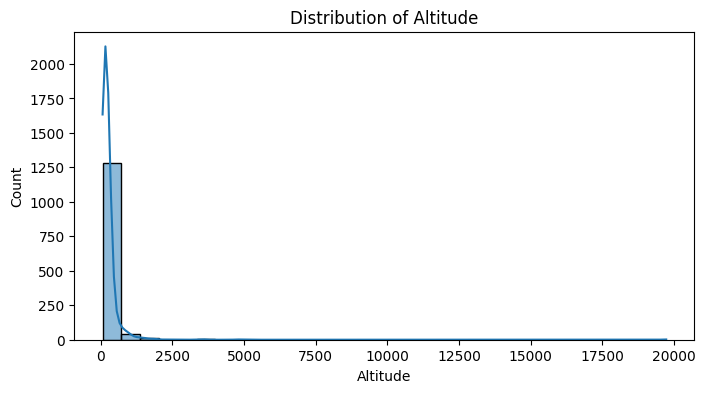

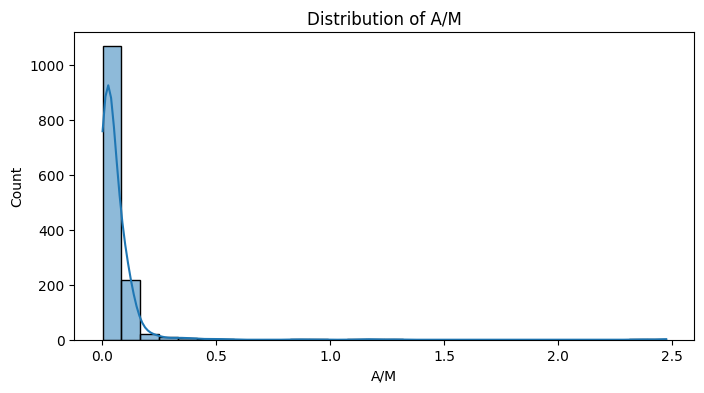

In [26]:
for column in df.columns:
    plt.figure(figsize=(8, 4))

    sns.histplot(df[column], kde=True, bins=30)

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

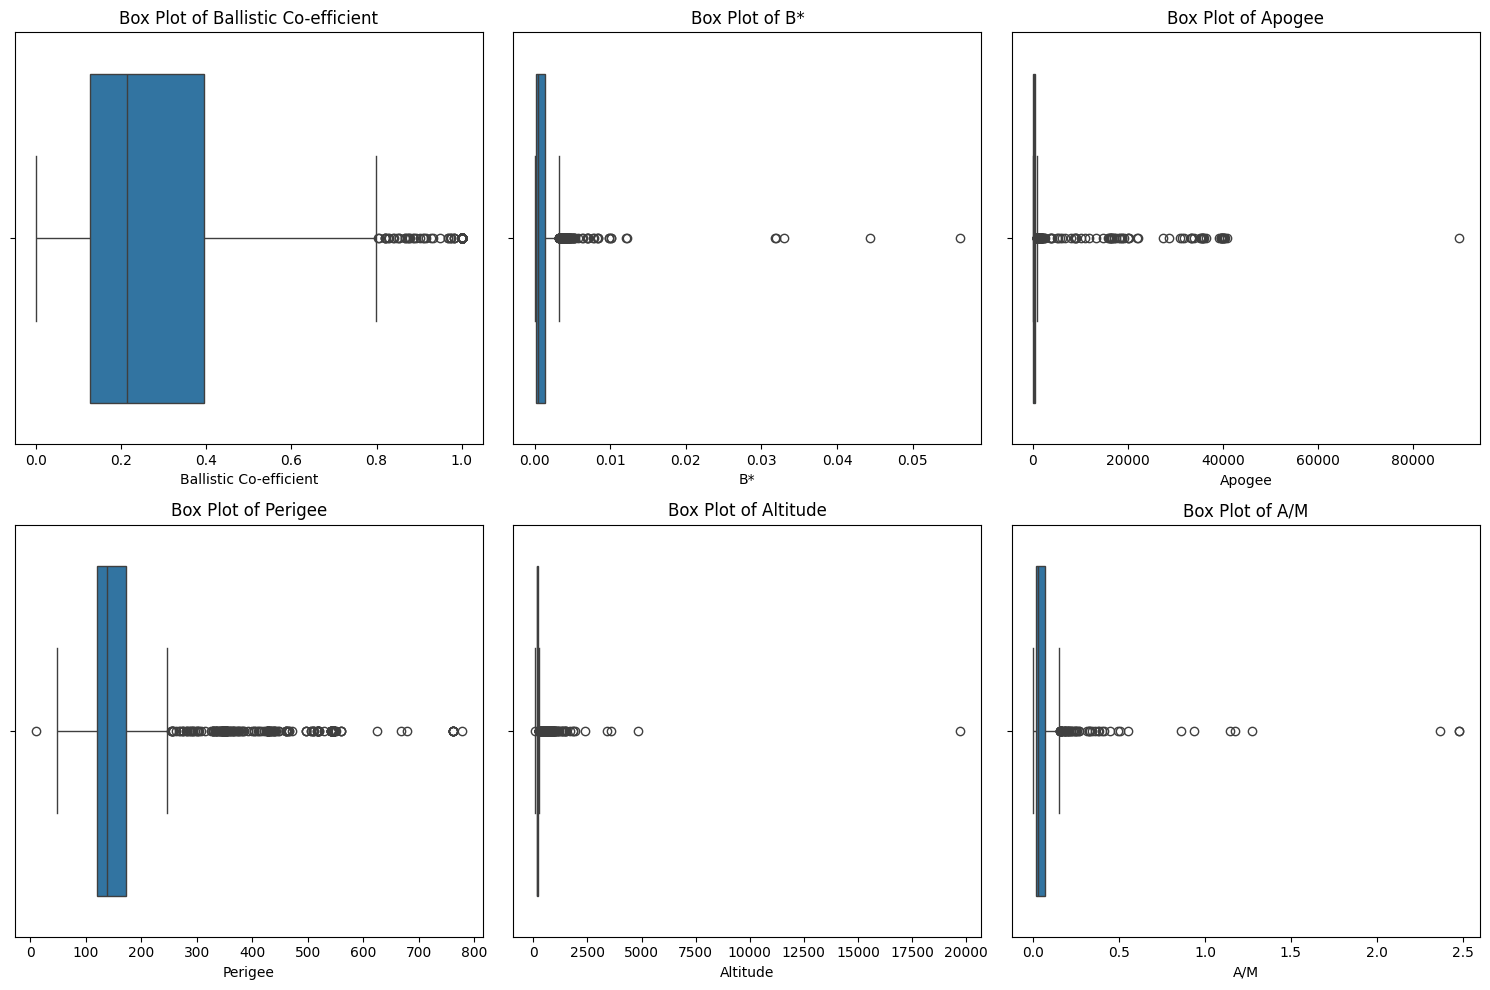

In [38]:
num_columns = len(df.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0) 

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  
axes = axes.flatten()  

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i]) 
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

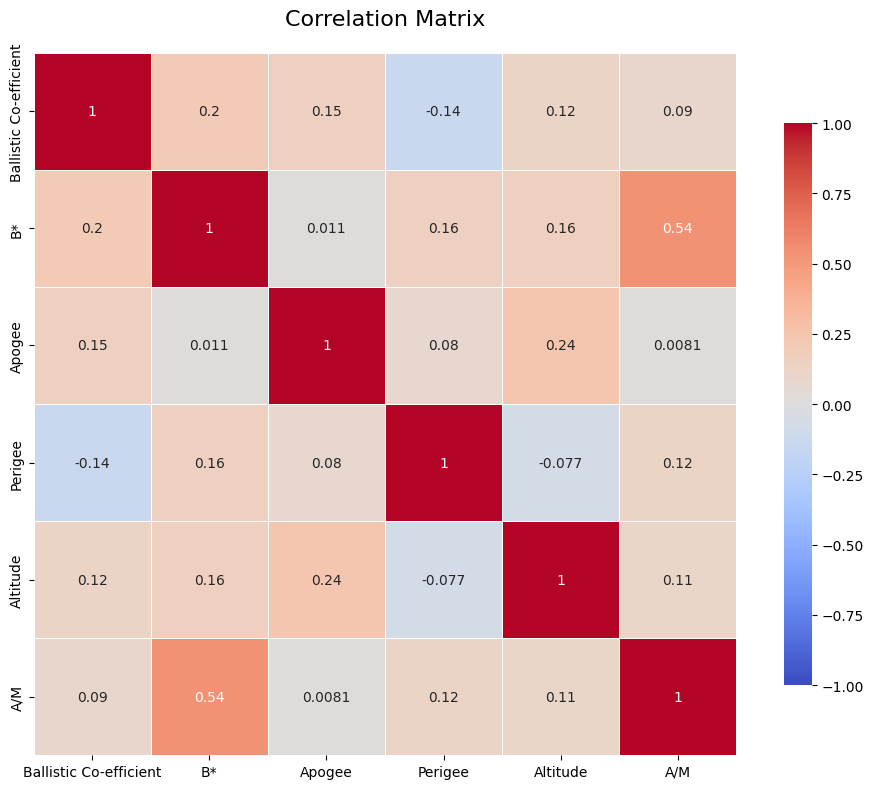

In [28]:
corr_matrix = df.corr()
    
plt.figure(figsize=(10, 8))
    

sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='coolwarm',  
                center=0,  
                vmin=-1, 
                vmax=1,
                square=True, 
                linewidths=0.5,  
                cbar_kws={"shrink": .8})  
    
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()

In [29]:
X = df.drop('A/M', axis=1)
y = df['A/M']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [33]:
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

B*                        0.510528
Perigee                   0.188903
Ballistic Co-efficient    0.143811
Altitude                  0.083280
Apogee                    0.073477
dtype: float64


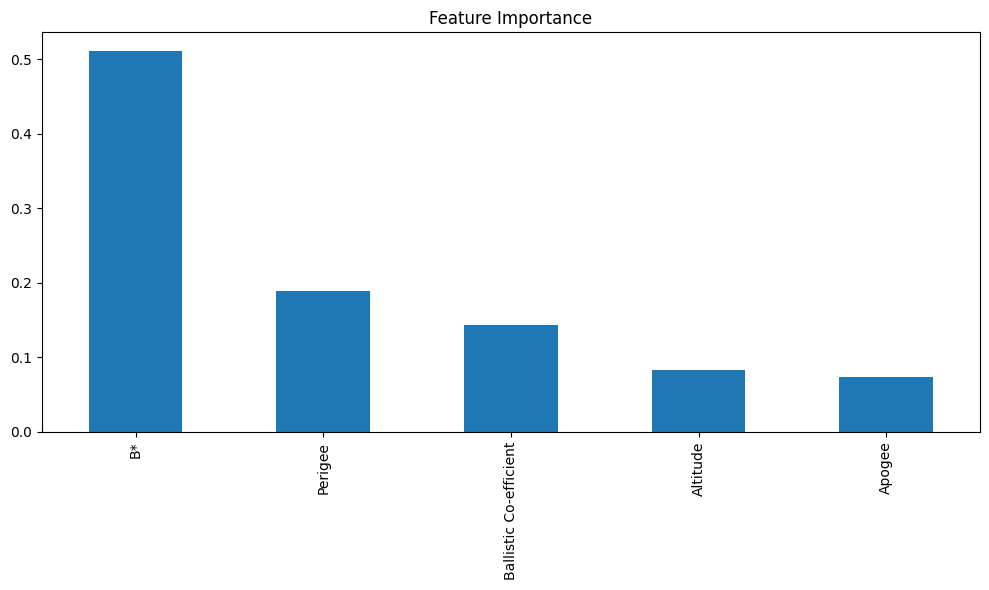

In [34]:
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

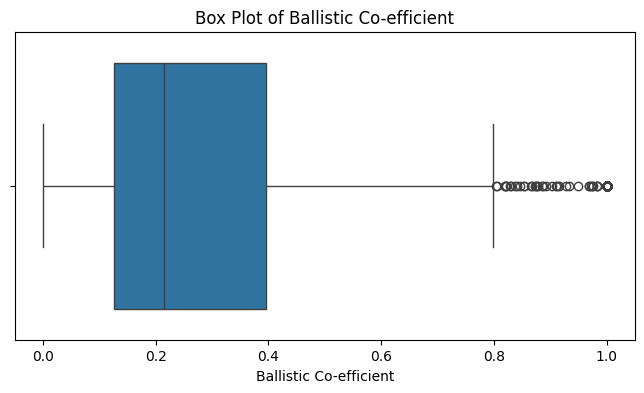

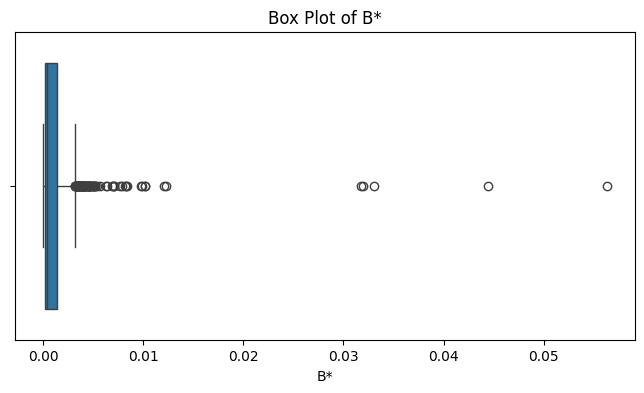

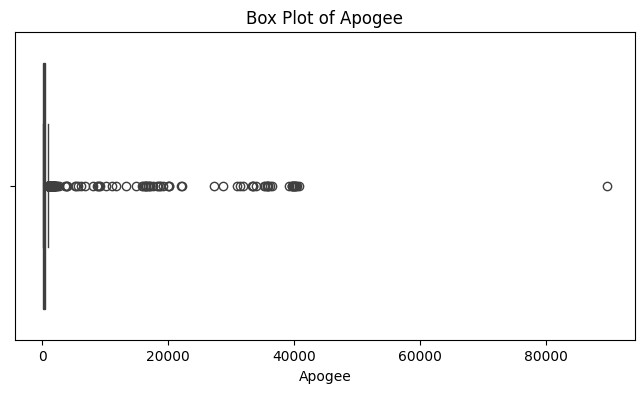

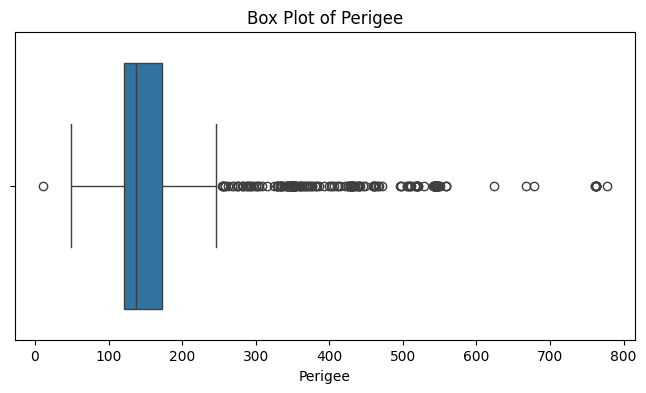

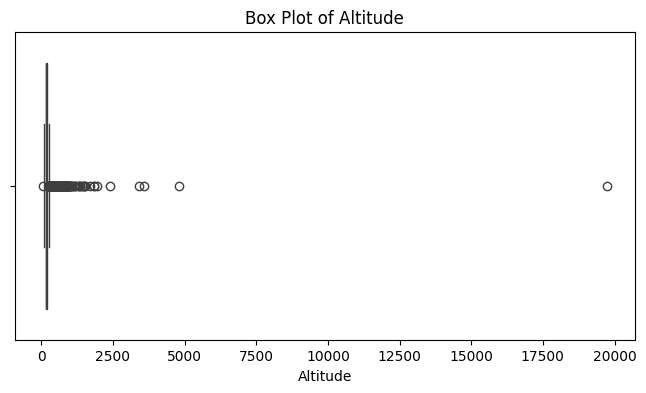

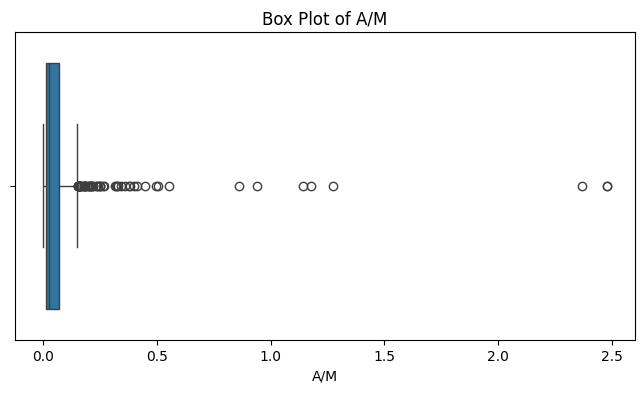

In [36]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [37]:
len(df)

1335

In [80]:
df = df[(df['B*'] <= 0.01) & 
        (df['Ballistic Co-efficient'] <= 0.8) &
        (df['Perigee'] <= 600) &
        (df['A/M'] <= 1)
]
len(df)

1155

In [81]:
(1335-1155) / 1335

0.1348314606741573

In [82]:
df.to_csv('/Users/suryatejachalla/Research/Re-entry Prediction/Data/cleaned_data.csv', index=False)